# Evaluate Regression Models Exercises

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Load the tips dataset from either pydataset or seaborn.



In [2]:
import seaborn as sns
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

    `from sklearn.linear_model import LinearRegression
    assuming X and y are already defined
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)`

Modify and add to the code above as necessary for it to work with the tips dataset.

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = .2, random_state = 123)
train, validate = train_test_split(train, test_size = .3, random_state = 123)

In [5]:
features = ['total_bill']

In [6]:
X_train = train[features]
y_train = train.tip

X_validate = validate[features]
y_validate = validate.tip

X_test = test[features]
y_test = test.tip

In [7]:
from sklearn.linear_model import LinearRegression
# assuming X and y are already defined
lm = LinearRegression().fit(X_train, y_train)
predictions = lm.predict(X_train)
train['yhat_baseline'] = train['tip'].mean()
train['yhat'] = lm.predict(train[['total_bill']])

In [8]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat
18,16.97,3.50,Female,No,Sun,Dinner,3,2.946985,2.741254
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.946985,1.642824
118,12.43,1.80,Female,No,Thur,Lunch,2,2.946985,2.228201
28,21.70,4.30,Male,No,Sat,Dinner,2,2.946985,3.275778
237,32.83,1.17,Male,Yes,Sat,Dinner,2,2.946985,4.533548


### 3. Plot the residuals for the linear regression model that you made.



In [9]:
train['residual'] =  train['tip'] - train['yhat']
train['residual_baseline'] = train['tip'] - train['yhat_baseline']

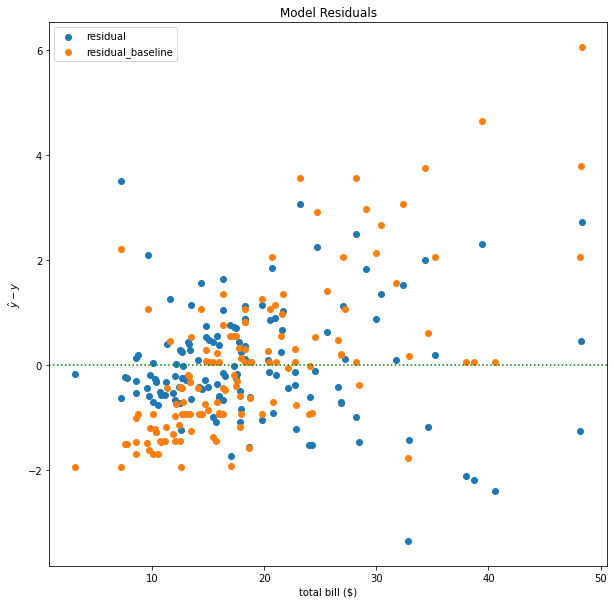

In [10]:
plt.figure(figsize=(10,10))
plt.axhline(color = 'green', ls = ':')
plt.scatter(x = 'total_bill', y = 'residual', data = train)
plt.scatter(x = 'total_bill', y = 'residual_baseline', data = train)
plt.legend()
plt.xlabel('total bill ($)')
plt.ylabel(r'$\hat{y}-y$')
plt.title('Model Residuals');

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [11]:
# sum of squares error
SSE = mean_squared_error(train.tip, train.yhat)*len(train)
# SSE baseline
SSE_baseline = mean_squared_error(train.tip, train.yhat_baseline)*len(train)


# mean squared error
MSE = mean_squared_error(train.tip, train.yhat)
# MSE baseline
MSE_baseline = mean_squared_error(train.tip, train.yhat_baseline)


# root mean squared error
RMSE = sqrt(mean_squared_error(train.tip, train.yhat))
# RMSE baseline
RMSE_baseline = sqrt(mean_squared_error(train.tip, train.yhat_baseline))

# explained sum of squares
ESS = sum((train.yhat - train.tip.mean())**2)


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [12]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric  model_error
0    SSE   153.536640
1    MSE     1.128946
2   RMSE     1.062519
          metric  model_error
0   SSE_baseline   286.431664
1   MSE_baseline     2.106115
2  RMSE_baseline     1.451246


### 7. What is the amount of variance explained in your model?

In [13]:
# evs = explained_variance_score(train.tip, train.yhat)
# print('Explained Variance = ', round(evs,3))

r2_score(train.tip, train.yhat)


0.4639676437939072

### 8. Is your model better than the baseline model?

Yes

In [14]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval['better_than_baseline'] = df_baseline_eval.model_error > df_eval.model_error
df_eval

,metric,model_error,error_delta,better_than_baseline
0,SSE,153.536640,-132.895024,True
1,MSE,1.128946,-0.977169,True
2,RMSE,1.062519,-0.388727,True


### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [15]:
def plot_residuals(df, y, yhat):
    plt.figure(figsize=(10,10))
    plt.axhline(color = 'green')
    plt.scatter(df[y], df[yhat], data = df)
    plt.xlabel(f'{y}')
    plt.ylabel(r'$\hat{y}-y$')
    plt.title('Model Residuals')
    return plt.show()

In [16]:
def regression_errors(y, yhat):
    # sum of squares error
    SSE = mean_squared_error(y, yhat)*len(train)
    # explained sum of squares
    ESS = sum((yhat - y.mean())**2)
    # mean squared error
    MSE = mean_squared_error(y, yhat)
    # root mean squared error
    RMSE = sqrt(mean_squared_error(y, yhat))
    return SSE, ESS, MSE, RMSE


In [17]:
def baseline_mean_errors(y):
    # SSE baseline
    SSE_baseline = mean_squared_error(y, y.mean())*len(y)
    # MSE baseline
    MSE_baseline = mean_squared_error(y, y.mean())
    # RMSE baseline
    RMSE_baseline = sqrt(mean_squared_error(y, y.mean()))
    return SSE_baseline, MSE_baseline, RMSE_baseline

In [18]:
def better_than_baseline(y, yhat):
    SSE, ESS, MSE, RMSE = regression_errors(y, yhat)
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y, yhat)
    if [SSE, MSE, RMSE] < [SSE_baseline, MSE_baseline, RMSE_baseline]:
        return True

In [19]:
import evaluate

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [20]:
from pydataset import data

In [21]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [22]:
X = df[['displ']]
y = df[['hwy']]

In [23]:
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
ols_model = LinearRegression().fit(df[['displ']], df.hwy)
df['yhat_baseline'] = df['hwy'].mean()
df['yhat'] = ols_model.predict(df[['displ']])

In [24]:
# evaluate.plot_residuals(df,df.hwy,df.yhat)

In [25]:
evaluate.better_than_baseline(y, df.yhat)

ValueError: Found input variables with inconsistent numbers of samples: [234, 1]